Date: 06/17/19

---
Data:17bintweet

Notr: 4658, Olumlu: 3663, Olumsuz: 5511

Results:
---


        precision    recall  f1-score   support

        notr   0.645592  0.614928  0.629887      1179
      olumlu   0.667964  0.562227  0.610551       916
     olumsuz   0.667519  0.765957  0.713358      1363

    accuracy    -            -       0.660497      3458
    macro avg   0.660358  0.647704  0.651266      3458
    weighted avg   0.660161  0.660497  0.657666      3458

In [0]:
import pandas as pd
import numpy as np
import nltk
import re
import pickle
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as plt

In [246]:
drive.mount('/content/gdrive')
!ls /content/gdrive/My\ Drive/Ante/17bintweet

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
okubeni.doc  test_tweets.xlsx  train_tweets.xlsx


## Variables

In [0]:
pos_adj = ['kusursuz','iyi','muthis','harika','idare eder','guzel','akli','aktif','alakadar','alakali','alisilmis','analitik','animsatici','antrenmanli','atak','aydinlatici','ayrintici','bagdastirici','bagimsiz','berk','betimleyici','bilindik','bilinen','bilissel','birinci','bitirim','ciddi',
        'curetkar','cabuk','cocuk ruhlu','cogulcu','cok yonlu','cozumlemeci','dayanakli','denetimli','dengeci','denk','destekci','detayli','diplomali','disiplinli','dogal','dominant','duyarli','dusunceli','eriskin','gercekci','gururlu',
        'haberli','hareketli','hassas','hatirlatici','hesapci','heyecanli','idareci','iddiali','ilgili','itaatkar','itaatli','kararli','kendi halinde','kuralli','mantiksal','metotlu','net','normal','organize','otoriteli','otoriter','olculu','mutevazi','caliskan',
        'oncelikli','parlak','pozitif','sakin','sistematik','sistemli','standartli','tarafsiz','toleransli','uyanik','yardimci','yatistirici','yatkin','dengeli','duygusal','etkili','gonullu','is birlikci','verimli','nazik','komik','bilge','akilli',
        'narin','planli','programli','sabirli','teskilatli','tutkulu','uzlasmaci','aciklayici','becerikli','bilgili','bilincli','cesaretli','dayanikli','degerli','deneyimli','dikkatli','dinamik','disiplinli','duyarli','durust','duzenli','duzeyli',
        'egitimli','gayretli','hazirlikli','sorunsuz','idealist','ileri goruslu','istekli','ise uygun','iyi','kidemli','mantikli','nezaketli','nitelikli','prezantabl','profesyonel','sagduyulu','tedbirli','temkinli','uzman','vasifli','yaratici','adaletli','adil',
        'akilli','caliskan','dakik','enerjik','hakli','kaliteli','optimist','olumlu','rasyonel','tutarli','uyumlu','uretken','verimli','yararli','yardimsever','yenilikci','yetenekli']
neg_adj = ['kusurlu','arizali','bozuk','kirik','suratsiz','mahvetti','mahvolmus','kotu','sorun','problem','fena','abartili','acgozlu','adaletsiz','agresif','agzi bozuk','ahlak disi','ahlaksiz','ahmak','ahmakca','akillara zarar','akillanmaz','alayci','aptal','aptalca','ara bozucu','arsiz','art niyetli','asagilik',
        'barbar','bombok','bozgun','bozuk','cani','cildirtici','cozumsuz','daginik','diktator','duzenbaz','duzensiz','eksik','eski','gecersiz','gulunc','gurultu','guvensiz','hadsiz','hain','hevessiz','iki yuzlu','istikrarsiz','islevsiz',
        'kalitesiz','kansiz','karaktersiz','kirilgan','kiskanc','kisiliksiz','kof','korkutucu','korkunc','kullanissiz','limoni','madara','medeniyetsiz','olumsuz','plansiz','problem','ruhsuz','sapik','sarsak','sonucsuz','seytan',
        'tecrubesiz','tekinsiz','tembel','temelsiz','terbiyesiz','ters ters','tertipsiz','tiksindirici','tutarsiz','ukala','utandirici','utanmaz','uyusuk','uyumsuz','uygunsuz','uyduruk','ustunkoru','usengec','uzucu','vahim','verimsiz',
        'yalaka','yalanci','yanlis','yapmacik','yaltak','yaramaz','yararsiz','yilisik','yuz kizartici','asik yuzlu','yuzsuz','zararli','zevksiz','zevzek','zirdeli','zorba',
        'acemi','agir aksak','agzi gevsek','anlayissiz','antipatik','asabi','asalak','asik suratli','asagilayici','avanak','azimsiz','bakimsiz','basiretsiz','basarisiz','beceriksiz','bencil','berbat','bilincsiz','bilmis bilmis',
        'bilgisiz','boktan','bosbogaz','budala','burnu havada','cadaloz','bunaltici','can sikici','ciddiyetsiz','cenesi dusuk','cenesiz','cirkef','cirkin','cokbilmis','dalgaci','dalkavuk','dangalak','dar kafali','darmadaginik',
        'dayaklik','deli','deneyimsiz','demode','degersiz','dedikoducu','despot','disiplinsiz','dikkatsiz','duyarsiz','dusman','duzensiz','eften puften','egitimsiz','embesil','engelli','eski kafali','ezik','felaket','gaddar','gammaz',
        'gayretsiz','gorgusuz','gucsuz','hatali','hilebaz','hosgorusuz','hosnutsuz','huysuz','igrenc','ilkel','incitici','iradesiz','issiz','kaba','kafasiz','kalpsiz','kanunsuz','kirli','korkak','kustah','kusurlu','kompleksli']

In [0]:
mislabeled_nouns = ['hizmet', 'urun', 'etiket', 'film'] 

In [0]:
tr_stops = ['a', 'acaba', 'alti', 'altmis', 'ama', 'ancak', 'arada', 'artik', 'aslinda', 'aslinda', 'ayrica', 'az', 'bana', 'bazen', 'bazi', 'bazilari', 'belki', 'ben', 'benden', 'beni',
        'benim', 'beri', 'bes', 'bile', 'bilhassa', 'bin', 'bir', 'biraz', 'bircogu', 'bircok', 'biri', 'birisi', 'birkac', 'birsey', 'biz', 'bizden', 'bize', 'bizi', 'bizim', 'boyle', 
        'boylece', 'bu', 'buna', 'bunda', 'bundan', 'bunlar', 'bunlari', 'bunlarin', 'bunu', 'bunun', 'burada', 'butun', 'cogu', 'cogunu', 'cok', 'cunku', 'da', 'daha', 'dahi', 'dan',
        'de', 'defa', 'diger', 'digeri', 'digerleri', 'diye', 'doksan', 'dokuz', 'dolayi', 'dolayisiyla', 'dort', 'e', 'eden', 'ederek', 'eger', 'elbette', 'elli', 'en', 'etmesi', 
        'ettigi', 'ettigini', 'fakat', 'falan', 'filan', 'gene', 'geregi', 'gerek', 'gibi', 'gore', 'hala', 'halde', 'halen', 'hangi', 'hangisi', 'hani', 'hatta', 'hem', 'henuz', 'hep', 'hepsi',
        'her', 'herhangi', 'herkes', 'herkese', 'herkesi', 'herkesin', 'hic', 'hicbir', 'hicbiri', 'i', 'i', 'icin', 'icinde', 'iki', 'ile', 'ilgili', 'ise', 'iste', 'itibaren', 'itibariyle',
        'kac', 'kadar', 'karsin', 'kendi', 'kendilerine', 'kendine', 'kendini', 'kendisi', 'kendisine', 'kendisini', 'kez', 'ki', 'kim', 'kime', 'kimi', 'kimin', 'kimisi', 'kimse', 'kirk', 
        'madem', 'mi', 'mi', 'milyar', 'milyon', 'mu', 'mu', 'nasil', 'ne', 'neden', 'nedenle', 'nerde', 'nerede', 'nereye', 'neyse', 'nicin', 'nin', 'nin', 'niye', 'nun', 'nun', 'o', 'obur', 'olan', 
        'olarak', 'oldugu', 'oldugunu', 'olduklarini', 'olmadigi', 'olmak', 'olmasi', 'olsa', 'olsun', 'olup', 'olursa', 'on', 'on', 'ona', 'once', 'ondan', 'onlar', 'onlara', 'onlardan', 'onlari', 
        'onlarin', 'onu', 'onun', 'orada', 'ote', 'oturu', 'otuz', 'oyle', 'oysa', 'pek', 'ragmen', 'sana', 'sanki', 'sanki', 'sayet', 'sekilde', 'sekiz', 'seksen', 'sen', 'senden', 'seni', 'senin',
        'sey', 'seyden', 'seye', 'seyi', 'seyler', 'simdi', 'siz', 'siz', 'sizden', 'sizden', 'size', 'sizi', 'sizi', 'sizin', 'sizin', 'sonra', 'soyle', 'su', 'suna', 'sunlari', 'sunu', 'ta', 'tabii',
        'tam', 'tamam', 'tamamen', 'tarafindan', 'trilyon', 'tum', 'tumu', 'u', 'u', 'uc', 'un', 'un', 'uzere', 'var', 'vardi', 've', 'veya', 'ya', 'yani', 'yapilan', 'yapilmasi', 'yapmak', 'yaptiklari',
        'ye', 'yedi', 'yerine', 'yetmis', 'yi', 'yi', 'yine', 'yirmi', 'yoksa', 'yu', 'yuz', 'zaten', 'zira', 'film ', 'filmi ', 'filmin', 'filme', 'filmde', 'gibi', 'bu', 'ben', 'olan', 'diye', 'sadece',
        'sonra', 'her', 'olarak', 'bne', 'bnm', 'bn', 'bnde', 'snde', 'orada', 'orda', 'surda','burda','surada', 'burada', 'orada']


# Preprocessing

Remove special chars

In [0]:
def remove_special_characters(entry):
    entry = entry.lower()
    entry = re.sub(r"[^a-zA-Z ]+", ' ', entry)
    string_length=len(entry)+1    
    string_revised=entry.ljust(string_length)
    return entry

In [0]:
def convert_turkish_letters(entry):
    entry = entry.lower()
    entry = entry.replace('ş', 's')
    entry = entry.replace('ı', 'i')
    entry = entry.replace('ğ', 'g')
    entry = entry.replace('ö', 'o')
    entry = entry.replace('ç', 'c')
    entry = entry.replace('ü', 'u')
    return entry

In [0]:
def remove_stopwords(entry):
    entry = ' '.join([word for word in entry.split() if word not in tr_stops])
    return entry

In [0]:
def remove_suffix(sentence):
    entry = sentence
    entry = entry.replace('sin ', ' ')
    entry = entry.replace('sun ', ' ')
    entry = entry.replace('imiz ', ' ')
    entry = entry.replace('umuz ', ' ')
    entry = entry.replace('ydi', ' ')
    entry = entry.replace('ydu', ' ')
    

    entry = entry.replace('di  ', ' ')
    entry = entry.replace('du  ', ' ')
    entry = entry.replace('tir  ', ' ')
    entry = entry.replace('tur  ', ' ')
    entry = entry.replace('ti  ', ' ')
    entry = entry.replace('tu  ', ' ')
    entry = entry.replace('lar ', ' ')
    entry = entry.replace('mus ', ' ')
    entry = entry.replace('mis ',  ' ')
    return entry

In [0]:
def remove_common_adjectives(entry):   
    temp = convert_turkish_letters(entry)
    temp = remove_special_characters(temp)
    temp = remove_stopwords(temp)
    temp = remove_suffix(temp)
    splitted = temp.split()
    
    positive = [word for word in splitted if word in pos_adj]
    negative = [word for word in splitted if word in neg_adj]
    temp = re.sub("|".join(pos_adj), " ", temp)
    temp = re.sub("|".join(neg_adj), " ", temp)
    string_length=len(temp)+1    # will be adding 10 extra spaces
    temp=temp.ljust(string_length)
    
    score = len(positive)-len(negative)
    if score < 0:
        score = 0
    elif score > 0:
        score = 1
    else:
        score = -1
    return temp,score

In [0]:
data = pd.read_excel(r'/content/gdrive/My Drive/Ante/17bintweet/train_tweets.xlsx')
data = data[['content','positivity']]
data['content'] = data['content'].apply(lambda x: x.lower())
data['content'] = data['content'].apply(lambda x: convert_turkish_letters(x))
data['content'] = data['content'].apply(lambda x: ''.join(remove_stopwords(x)))
data['content'] = data['content'].apply(lambda x: ''.join(remove_suffix(x)))
data['content'] = data['content'].apply(lambda x: ''.join(remove_special_characters(x)))
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['positivity'], random_state = 0)

In [256]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)


model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
sk_report = classification_report(
    digits=6,
    y_true=y_test.to_list(), 
    y_pred=predictions)
print(sk_report)
sk_report2 = confusion_matrix(
    y_true=y_test.to_list(), 
    y_pred=predictions, labels = ['olumsuz','olumlu','notr'])
print(sk_report2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

        notr   0.645963  0.617472  0.631396      1179
      olumlu   0.684278  0.579694  0.627660       916
     olumsuz   0.672026  0.766691  0.716244      1363

    accuracy                       0.666281      3458
   macro avg   0.667422  0.654619  0.658433      3458
weighted avg   0.666385  0.666281  0.663850      3458

[[1045  110  208]
 [ 194  531  191]
 [ 316  135  728]]


## Pos/Neg labeled words are weighted separately

In [0]:
def analyzer(entry):
    processed,v = remove_common_adjectives(entry)
    result = model.predict(vect.transform([processed]))
    p = result[0]
    
    print(p,v,processed)
    if (p == 'olumsuz') and (v == 0):
        return 'olumlu'
    elif (p == 'olumsuz') and (v == 1):
        return 'olumsuz'
    elif (p == 'olumlu') and (v == 0):
        return 'olumsuz'
    elif (p == 'olumlu') and (v == 1):
        return 'olumlu'
    elif (p == 'notr') and (v == 1):
        return 'olumlu'
    elif (p == 'notr') and (v == 0):
        return 'olumsuz'
    else:
        return p
    return p

In [0]:
def predicter(entries):
    res = []
    for entry in entries:
        processed,v = remove_common_adjectives(entry)
        result = model.predict(vect.transform([processed]))
        p = result[0]
        if (p == 'olumsuz') and (v == 0):
            res.append('olumlu')
        elif (p == 'olumsuz') and (v == 1):
            res.append('olumsuz')
        elif (p == 'olumlu') and (v == 0):
            res.append('olumsuz')
        elif (p == 'olumlu') and (v == 1):
            res.append('olumlu')
        elif (p == 'notr') and (v == 1):
            res.append('olumlu')
        elif (p == 'notr') and (v == 0):
            res.append('olumsuz')
        else:
            res.append(p)
    return res
    

In [259]:
sk_report = classification_report(
    digits=6,
    y_true=y_test.to_list(), 
    y_pred=predicter(X_test.to_list()))
print(sk_report)
sk_report2 = confusion_matrix(
    y_true=y_test.to_list(), 
    y_pred=predicter(X_test.to_list()), labels = ['olumsuz','olumlu','notr'])
print(sk_report2)


              precision    recall  f1-score   support

        notr   0.625357  0.556404  0.588869      1179
      olumlu   0.570588  0.529476  0.549264       916
     olumsuz   0.633098  0.724138  0.675565      1363

    accuracy                       0.615385      3458
   macro avg   0.609681  0.603339  0.604566      3458
weighted avg   0.613901  0.615385  0.612550      3458

[[987 171 205]
 [243 485 188]
 [329 194 656]]


Confusion matrix, without normalization
[[ 728  135  316]
 [ 191  531  194]
 [ 208  110 1045]]
Normalized confusion matrix
[[0.62 0.11 0.27]
 [0.21 0.58 0.21]
 [0.15 0.08 0.77]]


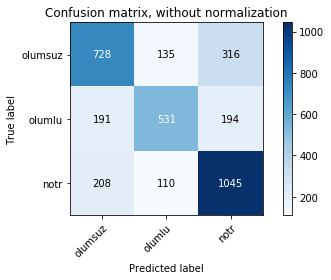

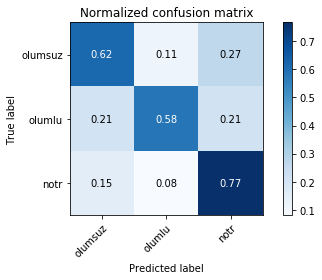

In [263]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['olumsuz','olumlu','notr']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.to_list(),predictions, classes=['olumsuz','olumlu','notr'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.to_list(), predictions, classes=['olumsuz','olumlu','notr'], normalize=True,
                      title='Normalized confusion matrix')

plt.pyplot.show()